In [1]:
# Import the conversion function
import json
from convertToJsonld import convert_to_json_ld

json_name='StandardCharacterisation' #CellConditioningDubarry2020 IEC62660-1-2018_7_3_Capacity LG_INR18650_MJ1_Cycle ReferencePerformanceTestDubarry2020 ShortCheckUp StandardCharacterisation

# Load the input JSON file
input_file_path = '../Examples/' +json_name+ '.json'
output_file_path = '../Examples/' +json_name+ 'test.jsonld'

with open(input_file_path, 'r') as infile:
    json_data = json.load(infile)

# Convert the JSON data to JSON-LD format
json_ld_data = convert_to_json_ld(json_data)

# Save the JSON-LD data to a new file
with open(output_file_path, 'w') as outfile:
    json.dump(json_ld_data, outfile, indent=4)

print("Conversion completed. JSON-LD file saved.")

Conversion completed. JSON-LD file saved.


In [4]:
from convertToPybamm import read_json_to_dict

read_json_to_dict("../examples/StandardCharacterisation.json")

['Charge at 0.33C until 4.2V',
 'Hold at 4.2V until 0.05A',
 'Discharge at 0.5C until 3V',
 'Charge at 0.33C until 4.2V',
 'Hold at 4.2V until 0.05A',
 'Discharge at 0.5C until 3V',
 'Charge at 0.33C until 4.2V',
 'Hold at 4.2V until 0.05A',
 'Discharge at 0.5C until 3V',
 'Charge at 0.33C until 4.2V',
 'Hold at 4.2V until 0.05A',
 'Discharge at 0.5C until 3V',
 'Charge at 0.33C until 4.2V',
 'Hold at 4.2V until 0.05A',
 'Discharge at 0.5C until 3V',
 'Charge at 0.33C until 4.2V',
 'Hold at 4.2V until 0.05A',
 'Rest for 1.0 hour',
 'Discharge at 0.04C until 3V',
 'Rest for 1.0 hour',
 'Charge at 0.04C until 4.2V',
 'Rest for 1.0 hour',
 'Discharge at 0.5C for 360sec',
 'Rest for 3.5 hour',
 'Discharge at 0.5C for 360sec',
 'Rest for 3.5 hour',
 'Discharge at 0.5C for 360sec',
 'Rest for 3.5 hour',
 'Discharge at 0.5C for 360sec',
 'Rest for 3.5 hour',
 'Discharge at 0.5C for 360sec',
 'Rest for 3.5 hour',
 'Discharge at 0.5C for 360sec',
 'Rest for 3.5 hour',
 'Discharge at 0.5C for 36

In [5]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

experiment = pybamm.Experiment(read_json_to_dict("../Examples/StandardCharacterisation.json"))

model = pybamm.lithium_ion.SPM()
sim = pybamm.Simulation(model, experiment=experiment)
sol = sim.solve()


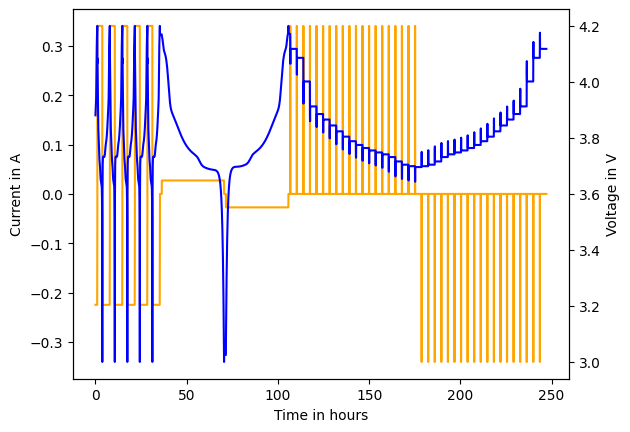

In [6]:
voltage = sol["Voltage [V]"].entries
time = sol["Time [h]"].entries
current = sol["Current [A]"].entries

plt.figure()
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(time,current,label="current",color='orange')
ax2.plot(time,voltage,label="voltage",color='blue')
ax.set_ylabel("Current in A")
ax2.set_ylabel("Voltage in V")
ax.set_xlabel("Time in hours")
plt.show()


Conversion completed. JSON-LD file saved.
